In [50]:
import pandas as pd
from psmpy import PsmPy
from psmpy.plotting import *
import numpy as np
from sklearn.preprocessing import LabelEncoder
from patsy import dmatrices
import statsmodels.api as sm

Importing the dataset, it contains a time stamp of each house between 2022 adn 2023

In [2]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd

# Create a Tkinter root window
root = tk.Tk()
root.withdraw()

# Open a file dialog to select a file
file_path = filedialog.askopenfilename()

# Read the selected file into a DataFrame
Data22_23 = pd.read_csv(file_path)  # Update the read_csv function if your file is 

In [3]:
Data22_23.columns

Index(['Berekeningstype', 'Energieklasse_2022', 'Gebouwklasse', 'Postcode',
       'Huisnummer', 'Huisnummertoevoeging', 'Gebouwtype', 'Gebouwsubtype',
       'Energiebehoefte', 'Primaire_fossiele_energie',
       'Aandeel_hernieuwbare_energie', 'Warmtebehoefte', 'address',
       'Energieklasse_2023', 'Pand_berekeningstype', 'Pand_gebouwtype',
       'Pand_gebouwsubtype', 'Pand_energiebehoefte',
       'Pand_primaire_fossiele_energie', 'Pand_aandeel_hernieuwbare_energie',
       'Pand_warmtebehoefte'],
      dtype='object')

# does energy label has an effect on energy consuption (proving)

In [4]:
EP_consume=Data22_23[pd.notna(Data22_23['Primaire_fossiele_energie']) & pd.notna(Data22_23[ 'Pand_primaire_fossiele_energie'])]

Remove all the + to make energy label a equal

In [5]:

EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A++++','A')
EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A+++','A')
EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A++','A')
EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A+','A')




EP_consume['Energieklasse_2022']=EP_consume['Energieklasse_2022'].replace('A++++','A')
EP_consume['Energieklasse_2022']=EP_consume['Energieklasse_2022'].replace('A+++','A')
EP_consume['Energieklasse_2022']=EP_consume['Energieklasse_2022'].replace('A++','A')
EP_consume['Energieklasse_2022']=EP_consume['Energieklasse_2022'].replace('A+','A')


C:\Users\dodih\AppData\Local\Temp\ipykernel_31564\3851873575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A++++','A')
C:\Users\dodih\AppData\Local\Temp\ipykernel_31564\3851873575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EP_consume['Energieklasse_2023']=EP_consume['Energieklasse_2023'].replace('A+++','A')
C:\Users\dodih\AppData\Local\Temp\ipykernel_31564\3851873575.py:3: SettingWithCopyWarning: 
A value is trying to 

Making ep_fossiel with all the colloms we need

In [6]:
ep_fossiel=EP_consume.loc[:,['address','Energieklasse_2022','Primaire_fossiele_energie', 'Energieklasse_2023','Pand_primaire_fossiele_energie','Gebouwtype']]

In [7]:
ep_fossiel

,address,Energieklasse_2022,Primaire_fossiele_energie,Energieklasse_2023,Pand_primaire_fossiele_energie,Gebouwtype
4,1011AH 101 C,C,208.27,C,208.27,Appartement
7,1011AJ 104 A,B,171.83,B,171.83,Appartement
9,1011AN 124 A,A,137.15,A,137.15,Appartement
10,1011AN 124 B,A,143.16,A,143.16,Appartement
11,1011AN 124 C,A,154.07,A,154.07,Appartement
...,...,...,...,...,...,...
4622424,9997PP 8 D,B,188.12,B,188.12,Vrijstaande woning
4622436,9998NZ 13 -,A,131.42,A,131.42,Vrijstaande woning
4622446,9998XB 9 -,B,182.85,C,202.24,Twee-onder-één-kap
4622447,9998XB 11 -,B,183.72,C,203.03,Twee-onder-één-kap


In [8]:
#delete the houses that have an energy decrease
ep_fossiel=ep_fossiel[~(ep_fossiel.Energieklasse_2022<ep_fossiel.Energieklasse_2023) ]

In [9]:
condition = ep_fossiel.Energieklasse_2022>ep_fossiel.Energieklasse_2023

Now we need to at the treatment, like does it have a change or not the enrgy label

In [10]:
# Create the new column using numpy.where()
ep_fossiel['treatment'] = np.where(condition, 1, 0)

C:\Users\dodih\AppData\Local\Temp\ipykernel_31564\2075350387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep_fossiel['treatment'] = np.where(condition, 1, 0)


Now make the gebouwtype nummbers

In [11]:

# Perform label encoding on the house type column
label_encoder = LabelEncoder()
encoded_house_type = label_encoder.fit_transform(ep_fossiel["Gebouwtype"])

# Replace the original house type column with the encoded labels
ep_fossiel["Gebouwtype"] = encoded_house_type

C:\Users\dodih\AppData\Local\Temp\ipykernel_31564\3058601671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ep_fossiel["Gebouwtype"] = encoded_house_type


We need to make a sample because it cant run, it shuts off automaticly

In [17]:
#without
df_sample1=ep_fossiel[~condition].sample(n = 4000, replace = False)

In [18]:
#with
df_sample2=ep_fossiel[condition].sample(n = 4000, replace = False)

In [19]:
df=pd.concat([df_sample1,df_sample2])

In [20]:
df

,address,Energieklasse_2022,Primaire_fossiele_energie,Energieklasse_2023,Pand_primaire_fossiele_energie,Gebouwtype,treatment
2477506,4621CA 10 -,A,152.31,A,152.31,3,0
3385761,6445XH 22 -,D,275.12,D,275.12,3,0
1651419,3076KT 406 -,B,176.50,B,176.50,3,0
1043715,2401JD 105 -,B,184.06,B,184.06,0,0
4256619,8484KJ 101 -,G,655.55,G,655.55,5,0
...,...,...,...,...,...,...,...
3499657,6661ZT 62 -,C,199.86,A,89.11,3,1
744500,1946AM 49 -,C,195.87,B,189.79,3,1
4492835,9665LE 20 -,G,467.43,A,128.13,2,1
987340,2313DD 14 -,B,179.03,A,126.93,2,1


Making energy labels to numbers

In [33]:
energy_labels = {'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6,'G':7}
df['Energieklasse_2022'] = df['Energieklasse_2022'].map(energy_labels)
df['Energieklasse_2023'] = df['Energieklasse_2023'].map(energy_labels)

Now we are doing the propensity score LR. The use of propensity scores allows to approach causality in the research. The propensity score can be used to match treatment and control groups based on their likelihood of receiving the treatment. (energy label change)

In [34]:
# exclude: ignore any covariates (columns) passed to the it during model fitting
# indx - required parameter that references a unique ID number for each case
psm = PsmPy(df, treatment='treatment', indx='address')

psm.logistic_ps(balance=False)
psm.predicted_data



,address,Energieklasse_2022,Primaire_fossiele_energie,Energieklasse_2023,Pand_primaire_fossiele_energie,Gebouwtype,propensity_score,propensity_logit,treatment
0,1025WR 503 -,2,189.26,1,127.41,0,0.999635,7.914317,1
1,1816VL 10 -,4,265.95,1,76.53,3,1.000000,11.512925,1
2,8013SM 47 -,7,387.16,1,57.76,0,1.000000,11.512925,1
3,7741HP 20 A,6,340.60,3,215.52,0,1.000000,11.512925,1
4,7741HP 20 A,6,340.60,3,215.52,0,1.000000,11.512925,1
...,...,...,...,...,...,...,...,...,...
8955,6961CE 15 -,3,201.48,3,201.48,3,0.004064,-5.501433,0
8956,9401BD 16 V,5,320.97,5,320.97,0,0.003959,-5.527827,0
8957,3841VE 159 -,3,236.62,3,236.62,2,0.004404,-5.420785,0
8958,6372NR 40 -,2,172.96,2,172.96,4,0.004292,-5.446720,0


C:\Users\dodih\AppData\Roaming\Python\Python39\site-packages\psmpy\psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


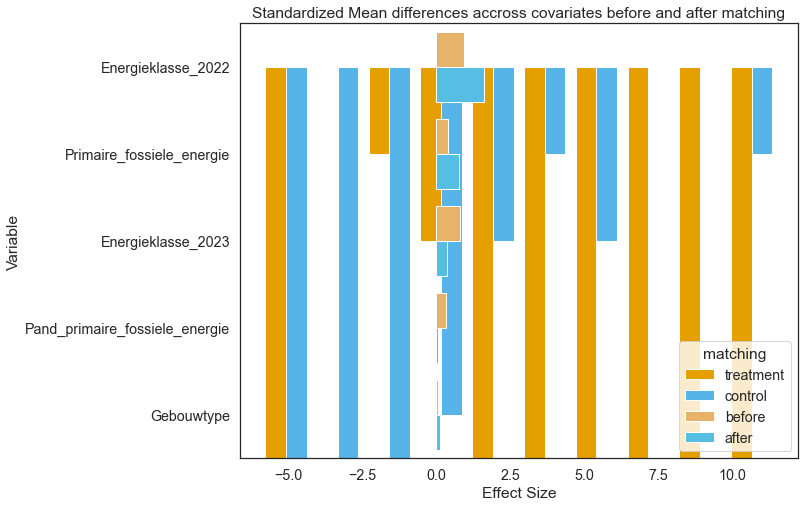

In [35]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

psm.plot_match(Title='Matching Result', Ylabel='# of obs', Xlabel= 'propensity logit', names = ['treatment', 'control'])

psm.effect_size_plot(save=False)

matched_data=psm.df_matched

In [36]:
matched_data

,address,Energieklasse_2022,Primaire_fossiele_energie,Energieklasse_2023,Pand_primaire_fossiele_energie,Gebouwtype,propensity_score,propensity_logit,treatment,matched_ID
0,1025WR 503 -,2,189.26,1,127.41,0,0.999635,7.914317,1,3901RG 8 -
1,1816VL 10 -,4,265.95,1,76.53,3,1.000000,11.512925,1,3901RG 8 -
2,8013SM 47 -,7,387.16,1,57.76,0,1.000000,11.512925,1,3901RG 8 -
3,7741HP 20 A,6,340.60,3,215.52,0,1.000000,11.512925,1,3901RG 8 -
4,7741HP 20 A,6,340.60,3,215.52,0,1.000000,11.512925,1,1336ZM 23 -
...,...,...,...,...,...,...,...,...,...,...
8386,1834GB 24 -,5,323.62,5,323.62,2,0.003393,-5.682754,0,NaN
8387,8263AL 5 -,5,323.30,5,323.30,2,0.003393,-5.682782,0,NaN
8388,5271GC 97 -,5,321.89,5,321.89,2,0.003392,-5.682905,0,NaN
8389,4142TA 1 -,5,321.33,5,321.33,2,0.003392,-5.682954,0,NaN


In [37]:
df_pre=matched_data.loc[:,['address','Energieklasse_2022','Primaire_fossiele_energie','Gebouwtype','treatment']]

In [38]:
df_post=matched_data.loc[:,['address','Energieklasse_2023','Pand_primaire_fossiele_energie','Gebouwtype','treatment']]

In [39]:
df_pre['post_treatment']=0

In [40]:
df_post['post_treatment']=1

In [43]:
df_post

,address,Energieklasse_2023,Pand_primaire_fossiele_energie,Gebouwtype,treatment,post_treatment
0,1025WR 503 -,1,127.41,0,1,1
1,1816VL 10 -,1,76.53,3,1,1
2,8013SM 47 -,1,57.76,0,1,1
3,7741HP 20 A,3,215.52,0,1,1
4,7741HP 20 A,3,215.52,0,1,1
...,...,...,...,...,...,...
8386,1834GB 24 -,5,323.62,2,0,1
8387,8263AL 5 -,5,323.30,2,0,1
8388,5271GC 97 -,5,321.89,2,0,1
8389,4142TA 1 -,5,321.33,2,0,1


In [44]:
df_pre.rename(columns = {'Energieklasse_2022':'energy_label', 'Primaire_fossiele_energie':'fossiele_energy'}, inplace = True)

In [45]:
df_post.rename(columns = {'Energieklasse_2023':'energy_label', 'Pand_primaire_fossiele_energie':'fossiele_energy'}, inplace = True)

In [46]:
data_ep_fossiel=pd.concat([df_pre,df_post])

In [48]:
data_ep_fossiel.reset_index(drop=True)

,address,energy_label,fossiele_energy,Gebouwtype,treatment,post_treatment
0,1025WR 503 -,2,189.26,0,1,0
1,1816VL 10 -,4,265.95,3,1,0
2,8013SM 47 -,7,387.16,0,1,0
3,7741HP 20 A,6,340.60,0,1,0
4,7741HP 20 A,6,340.60,0,1,0
...,...,...,...,...,...,...
16777,1834GB 24 -,5,323.62,2,0,1
16778,8263AL 5 -,5,323.30,2,0,1
16779,5271GC 97 -,5,321.89,2,0,1
16780,4142TA 1 -,5,321.33,2,0,1


Difference-in-differences (DiD) is a statistical method used to estimate the causal effect of an intervention or policy change. So we now look if the energy label has a causal effect on the consumption.

it uses the last dataset with all the matches made 

In [51]:
#applying the analysis

DID_data=data_ep_fossiel.loc[:,['fossiele_energy','treatment','post_treatment']]

DID_data

reg_exp = 'fossiele_energy ~ post_treatment + treatment + post_treatment*treatment'

y_train, X_train = dmatrices(reg_exp, DID_data, return_type='dataframe')

did_model = sm.OLS(endog=y_train, exog=X_train)

did_model_results = did_model.fit()

did_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fossiele_energy   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     690.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:01:38   Log-Likelihood:            -1.0927e+05
No. Observations:               16782   AIC:                         2.186e+05
Df Residuals:                   16778   BIC:                         2.186e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  151.2317      2.513     60.174      0.000     146.305     156.158
post_treatment              -0.5481      3.554     -0.154      0.877      -7.515       6.419
treatment                  128.3797      3.554     36.122      0.000     121.413     135.346
post_treatment:treatment  -137.4775      5.026    -27.352      0.000    -147.329    -127.626
==============================================================================
Omnibus:                    52878.861   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9007653005.019
Skew:                          50.019   Prob(JB):                         0.00
Kurtosis:                    3590.739   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We proved that the energy label has an effect on energy consumption. meaning there is a difference between energy consumption based on energy label. 